In [1]:
import torch
import re
def xprint(s):
    s = str(s)
    s = re.sub(' *#.*','',s)
    print(s)

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def myfn(x):
    y = x[0]
    for i in range(1, x.size(0)):
        y = y + x[i]
    return y

In [3]:
inp = torch.randn(5,5)
traced_fn = torch.jit.trace(myfn, inp)
print(traced_fn.code)

def myfn(x: Tensor) -> Tensor:
  y = torch.select(x, 0, 0)
  y0 = torch.add(y, torch.select(x, 0, 1), alpha=1)
  y1 = torch.add(y0, torch.select(x, 0, 2), alpha=1)
  y2 = torch.add(y1, torch.select(x, 0, 3), alpha=1)
  _0 = torch.add(y2, torch.select(x, 0, 4), alpha=1)
  return _0



C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
scripted_fn = torch.jit.script(myfn)
print(scripted_fn.code)

def myfn(x: Tensor) -> Tensor:
  y = torch.select(x, 0, 0)
  _0 = torch.__range_length(1, torch.size(x, 0), 1)
  y0 = y
  for _1 in range(_0):
    i = torch.__derive_index(_1, 1, 1)
    y1 = torch.add(y0, torch.select(x, 0, i), alpha=1)
    y0 = y1
  return y0



In [5]:
xprint(scripted_fn.graph)

graph(%x.1 : Tensor):
  %10 : bool = prim::Constant[value=1]()
  %2 : int = prim::Constant[value=0]()
  %5 : int = prim::Constant[value=1]()
  %y.1 : Tensor = aten::select(%x.1, %2, %2)
  %7 : int = aten::size(%x.1, %2)
  %9 : int = aten::__range_length(%5, %7, %5)
  %y : Tensor = prim::Loop(%9, %10, %y.1)
    block0(%11 : int, %y.6 : Tensor):
      %i.1 : int = aten::__derive_index(%11, %5, %5)
      %19 : Tensor = aten::select(%x.1, %2, %i.1)
      %y.3 : Tensor = aten::add(%y.6, %19, %5)
      -> (%10, %y.3)
  return (%y)



In [10]:
import sys
sys.path.append('..')

In [12]:
from p2ch13.model_seg import UNetWrapper

In [17]:
seg_dict = torch.load('../data-unversioned/part2/models/p2ch13/seg_2019-10-20_15.57.21_none.best.state', map_location='cpu')
seg_model = UNetWrapper(in_channels=8, n_classes=1, depth=4, wf=3, padding=True, batch_norm=True, up_mode='upconv')
seg_model.load_state_dict(seg_dict['model_state'])
seg_model.eval()
for p in seg_model.parameters():
    p.requires_grad_(False)

traced_seg_model = torch.jit.trace()

In [5]:
import time

def print_func_name(time):
    def decorator(func):
        def wrap():
            print("Now use function '{}'".format(func.__name__))
            print("Now Unix time is {}.".format(int(time)))
            func()
        return wrap
    return decorator


#第一層 def print_func_name(time) 是用來解析 decorator 傳入的參數
#第二層 def decorator(func) 是吃進主要要修飾的function

@print_func_name(time=(time.time()))
def dog_bark():
    print("Bark !!!")

dog_bark()

Now use function 'dog_bark'
Now Unix time is 1658108456.
Bark !!!


In [8]:
class Dog:
    def __init__(self, func):
        self.talent = func

    def bark(self):
        print("Bark !!!")

@Dog
def dog_can_pee():
    print("I can pee very hard......")

@Dog
def dog_can_jump():
    print("I can jump uselessly QQQ")

@Dog
def dog_can_poo():
    print("I can poo like a super pooping machine!")

dog_1 = dog_can_pee
dog_1.talent()
dog_1.bark()

dog_2 = dog_can_jump
dog_2.talent()
dog_2.bark()

dog_3 = dog_can_poo
dog_3.talent()
dog_3.bark()

I can pee very hard......
Bark !!!
I can jump uselessly QQQ
Bark !!!
I can poo like a super pooping machine!
Bark !!!


In [28]:
#Server Side
import numpy as np
import sys
import os
import torch
from flask import Flask, request, jsonify
import json

sys.path.append("/home/danny/SourceCode/PyTorch_Book_Code")
#print(os.getcwd())
from p2ch12.model import LunaModel

model = LunaModel()
model.load_state_dict(torch.load("../data/part2/models/cls_2020-02-06_14.16.55_final-nodule-nonnodule.best.state",
                                 map_location='cpu')['model_state'])

<All keys matched successfully>

In [87]:
#Client Side
import json
import io
import torch

im, cl, id, pos = torch.load('../data/p3ch15/cls_val_example.pt')
meta = {'shape': list(im.shape)}
data = bytearray(im.numpy())
meta, im.shape

({'shape': [1, 32, 48, 48]}, torch.Size([1, 32, 48, 48]))

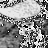

In [100]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

transform = T.ToPILImage()

#Convert a Torch Tensor to PIL image
img = transform(im.squeeze(0)[0])
img

In [108]:
img2 = Image.open("../data/p1ch2/horse.jpg")
img3 = np.asarray(img2)
img3.shape
#change image channel ordering between channels first and channels last in numpy array
img4 = np.moveaxis(img3, -1, 0)
input_tensor = torch.from_numpy(np.expand_dims(img4, axis=0)).to(torch.float32)
img3.shape, input_tensor.shape

((1220, 1500, 3), torch.Size([1, 3, 1220, 1500]))

In [71]:
#Convert a numpy array(from bytearray) to Torch Tensor
in_tensor1d = torch.from_numpy(np.frombuffer(data, dtype=np.float32))
in_tensor4d = in_tensor.view(*meta['shape'])
in_tensor4d.shape

torch.Size([1, 32, 48, 48])

In [82]:
in_tensor5d = in_tensor4d.unsqueeze(0)
out_tensor = model(in_tensor5d)[1].squeeze(0)
out_tensor, out_tensor.shape

(tensor([1.0000e+00, 4.2058e-09], grad_fn=<SqueezeBackward1>), torch.Size([2]))

In [84]:
probs = out_tensor.tolist()
probs

[1.0, 4.205779724486547e-09]

In [81]:
out = {'prob_malignant': probs[1]}
out

{'prob_malignant': 4.205779724486547e-09}

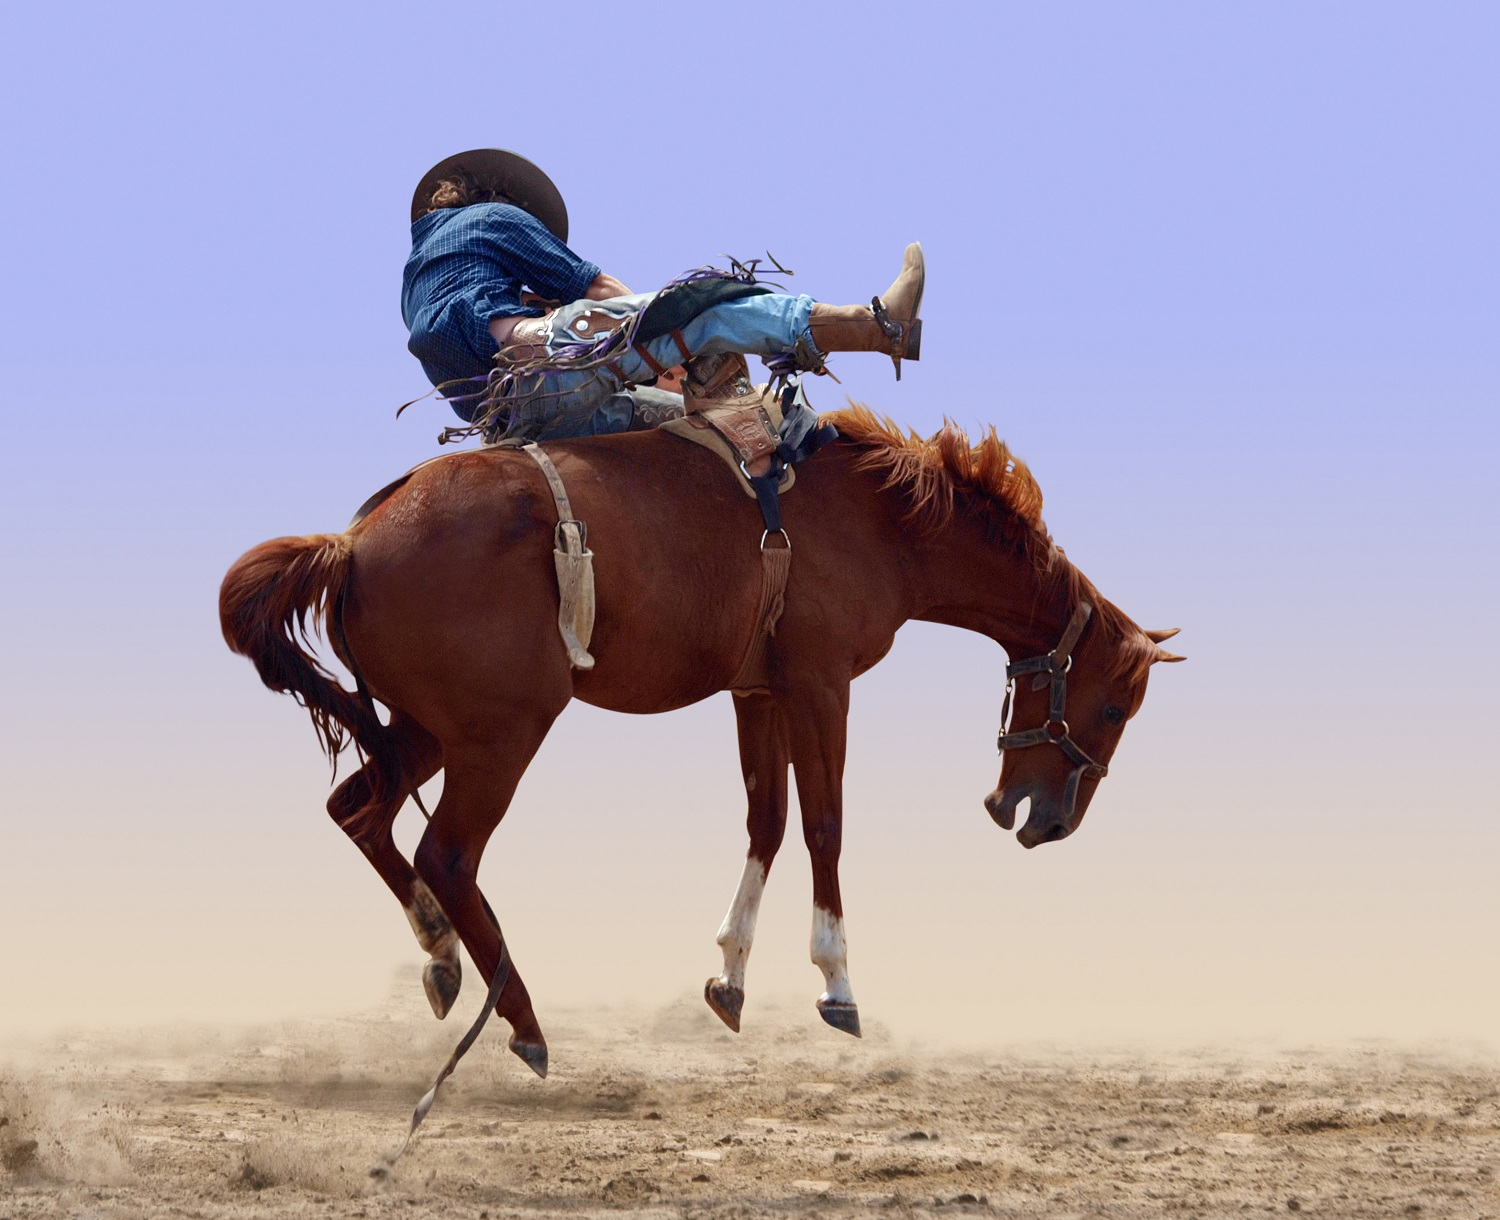

<class 'PIL.Image.Image'>
<class 'torch.Tensor'>


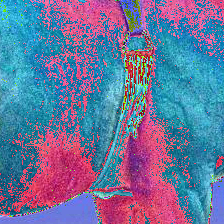

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [11]:
#https://blog.csdn.net/tsq292978891/article/details/78767326
#PIL.Image/numpy.ndarray與Tensor的相互轉換

#-*-coding:utf-8-*-
import torch
from torchvision import transforms
from PIL import Image
import cv2

img_path = "../data/p1ch2/horse.jpg"  

transform1 = transforms.Compose([
    transforms.CenterCrop((224,224)), # 只能对PIL图片进行裁剪
    transforms.ToTensor(), 
    ]
)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
all_transforms = transforms.Compose([
                    transforms.RandomGrayscale(),
                    transforms.RandomHorizontalFlip(), # 对PIL.Image图片进行操作
                    transforms.CenterCrop((224,224)), # 只能对PIL图片进行裁剪
                    transforms.ToTensor(),
                    normalize])

## PIL图片与Tensor互转
img_PIL = Image.open(img_path).convert('RGB')
img_PIL.show() # 原始图片
#img_PIL_Tensor = transform1(img_PIL)
img_PIL_Tensor = all_transforms(img_PIL)

print(type(img_PIL))
print(type(img_PIL_Tensor))

#Tensor转成PIL.Image重新显示
new_img_PIL = transforms.ToPILImage()(img_PIL_Tensor).convert('RGB')
new_img_PIL.show() # 处理后的PIL图片

## opencv读取的图片与Tensor互转
# transforms中，没有对np.ndarray格式图像的操作
img_cv = cv2.imread(img_path)
transform2 = transforms.Compose([
    transforms.ToTensor(), 
    ]
)

img_cv_Tensor = transform2(img_cv)
print(type(img_cv))
print(type(img_cv_Tensor))



In [13]:
#https://clay-atlas.com/blog/2020/09/02/pytorch-cn-squeeze-unsqueeze-usage/
# PyTorch 框架中的 squeeze()、unsqueeze() 用途

# coding: utf-8
import torch

data = torch.tensor([
    [[0, 1, 2],
     [3, 4, 5],
     [6, 7, 8],]
])

print('Shape:', data.shape)

# squeeze()
squeeze_data = data.squeeze(0)
print('squeeze data:', squeeze_data)
print('squeeze(0) shape:', squeeze_data.shape)


Shape: torch.Size([1, 3, 3])
squeeze data: tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
squeeze(0) shape: torch.Size([3, 3])


In [14]:
# coding: utf-8
import torch


data = torch.tensor([
    [[0, 1, 2],
     [3, 4, 5],
     [6, 7, 8],]
])

print('Shape:', data.shape)


# unsqueeze()
unsqueeze_data = data.unsqueeze(0)
print('unsqueeze data:', unsqueeze_data)
print('unsqueeze(0) shape:', unsqueeze_data.shape)

Shape: torch.Size([1, 3, 3])
unsqueeze data: tensor([[[[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]]])
unsqueeze(0) shape: torch.Size([1, 1, 3, 3])


In [15]:
#其實這兩種去除／增加維度的方法，我們都可以透過 view() 函式來完成
# 比方說我們要將 [1, 3, 3] 維度的 data 變數增加一個維度，我們只需要這樣寫：
data = data.view([1, 1, 3, 3])
data

tensor([[[[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]]])

In [25]:
#https://blog.csdn.net/lingyu_me/article/details/106837084
from ctypes import *

a=c_int(90)
addr=addressof(a)
s=c_char_p(addr)
print(s.value)
a.value=65
print(s.value)
alignment(a)
alignment(c_double)
class POINT(Structure):
    _fields_=[('x',c_int),('y',c_int)]

p1=POINT(540,960)        
print("POINT.y:", POINT.y)

def getValue(Cint):
    print('getValue:',cast(Cint,POINTER(c_int)).contents.value)

def getContent(Cint):
    print('getContent:',cast(Cint,POINTER(POINT)).contents)

getValue(byref(p1,4))
getContent(byref(p1))

event = cast(byref(p1),POINTER(POINT)).contents
event.x

b'Z'
b'A'
POINT.y: <Field type=c_int, ofs=4, size=4>
getValue: 960
getContent: <__main__.POINT object at 0x7fc5c5ce0640>


540

uint8
(1108, 1477, 3)
(1108, 1477, 3)


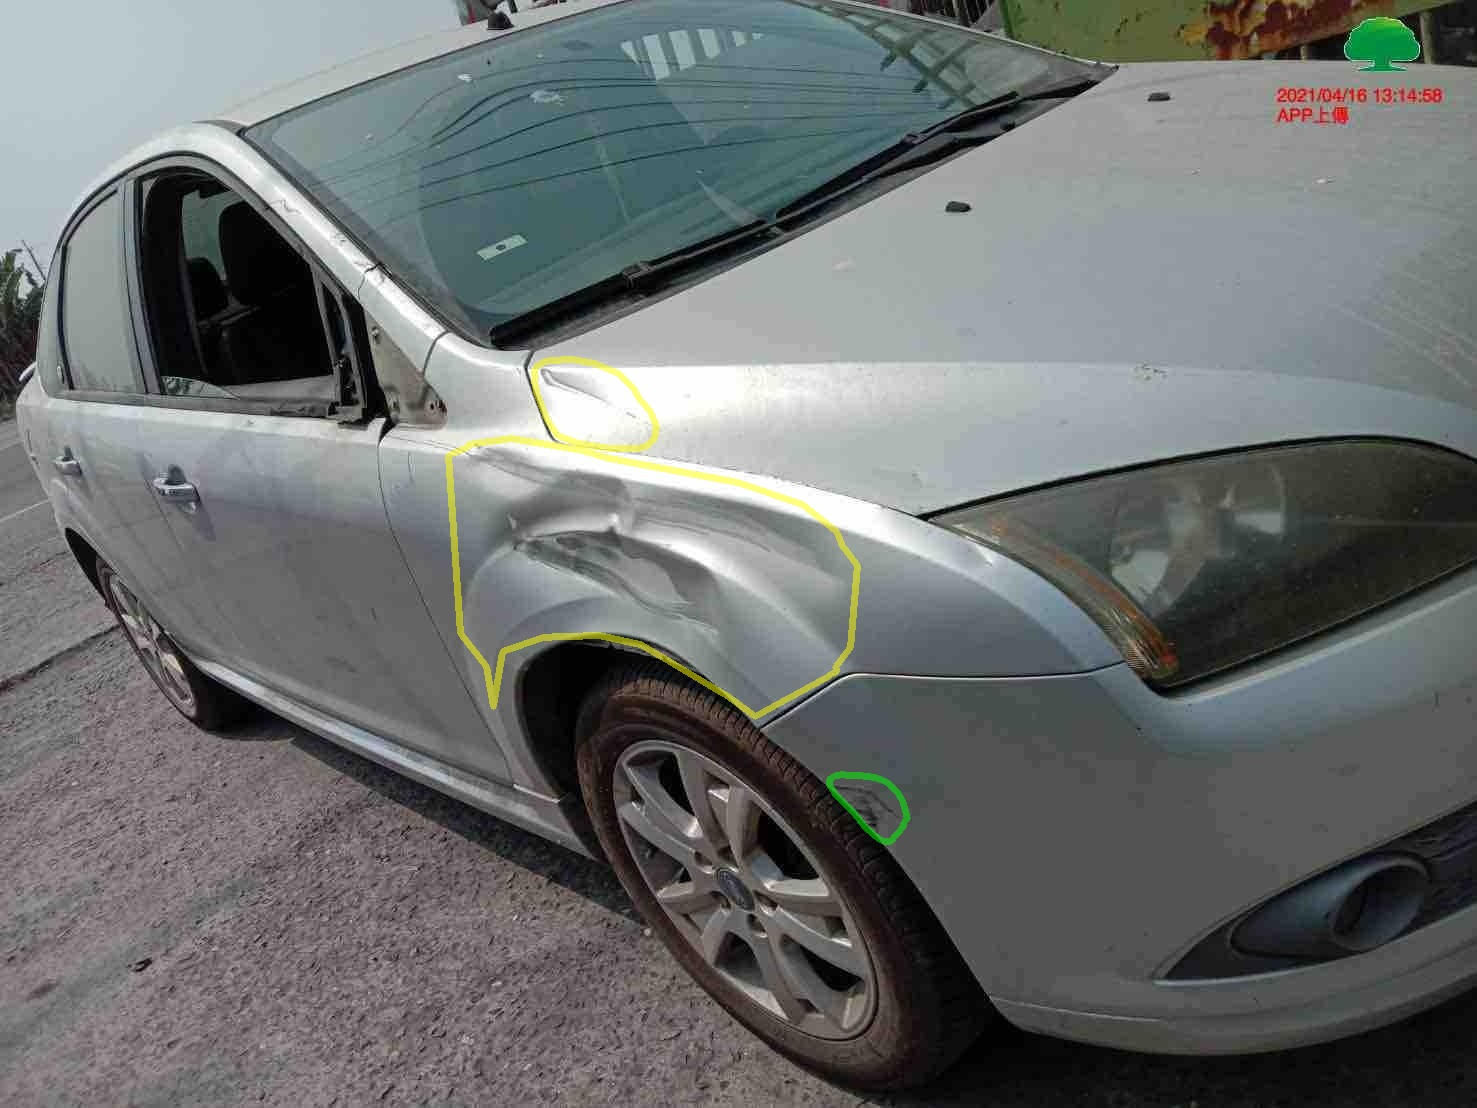

True


In [14]:
from PIL import Image
import requests
import json
import io
import numpy as np

img_path = "source/predict_car.png"  
img_PIL = Image.open(img_path)

# proper way to convert between images and numpy arrays
img_ndarr = np.array(img_PIL)
print(img_ndarr.dtype), print(img_ndarr.shape)
img_blob = img_ndarr.tobytes()


to_img_ndarr = np.frombuffer(img_blob, dtype='uint8')
to_img_ndarr = to_img_ndarr.reshape(img_ndarr.shape)
print(to_img_ndarr.shape)
to_img = Image.fromarray(to_img_ndarr)
to_img.show()
print(np.array_equal(to_img, img_ndarr))